In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

In [5]:
# Load CSV file
df = pd.read_csv('ai4i2020.csv')

In [48]:
# Observe the first five lines
print(df.head())

   UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  TWF  \
0                    1551         42.8                0                0    0   
1                    1408         46.3                3                0    0   
2                    1498         49.4                5                0    0   
3                    1433         39.5                7                0    0   
4                    1408         40.0                9                0    0   

   HDF  PWF  OSF  RNF  Type_encoded  
0    0    0    0    0             2  
1   

In [7]:
# Show basic statistics of the dataset
print(df.describe())

               UDI  Air temperature [K]  Process temperature [K]  \
count  10000.00000         10000.000000             10000.000000   
mean    5000.50000           300.004930               310.005560   
std     2886.89568             2.000259                 1.483734   
min        1.00000           295.300000               305.700000   
25%     2500.75000           298.300000               308.800000   
50%     5000.50000           300.100000               310.100000   
75%     7500.25000           301.500000               311.100000   
max    10000.00000           304.500000               313.800000   

       Rotational speed [rpm]   Torque [Nm]  Tool wear [min]  Machine failure  \
count            10000.000000  10000.000000     10000.000000     10000.000000   
mean              1538.776100     39.986910       107.951000         0.033900   
std                179.284096      9.968934        63.654147         0.180981   
min               1168.000000      3.800000         0.000000   

In [8]:
# Information about data types and missing values
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [49]:
# Preprocessing steps

# Check if there are any missing values in the data set.
missing_values = df.isnull().sum()

# Review the starting columns and examples of the dataset
data_preview = df.head()

missing_values, data_preview

(UDI                        0
 Product ID                 0
 Type                       0
 Air temperature [K]        0
 Process temperature [K]    0
 Rotational speed [rpm]     0
 Torque [Nm]                0
 Tool wear [min]            0
 Machine failure            0
 TWF                        0
 HDF                        0
 PWF                        0
 OSF                        0
 RNF                        0
 Type_encoded               0
 dtype: int64,
    UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
 0    1     M14860    M                298.1                    308.6   
 1    2     L47181    L                298.2                    308.7   
 2    3     L47182    L                298.1                    308.5   
 3    4     L47183    L                298.2                    308.6   
 4    5     L47184    L                298.2                    308.7   
 
    Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  TWF  \
 0           

In [11]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# One-Hot Encoding for categorical variables
encoder = OneHotEncoder(sparse_output=False)
type_encoded = encoder.fit_transform(df[['Type']])

# Adding One-Hot encoded columns to DataFrame
type_encoded_df = pd.DataFrame(type_encoded, columns=encoder.get_feature_names_out(['Type']))
df_encoded = df.join(type_encoded_df).drop('Type', axis=1)

# Standardization for continuous variables
scaler = StandardScaler()
scaled_columns = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
df_encoded[scaled_columns] = scaler.fit_transform(df_encoded[scaled_columns])

# Let's check the results by showing the first five rows
df_encoded.head()

,UDI,Product ID,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Type_H,Type_L,Type_M
0,1,M14860,-0.952389,-0.947360,0.068185,0.282200,-1.695984,0,0,0,0,0,0,0.0,0.0,1.0
1,2,L47181,-0.902393,-0.879959,-0.729472,0.633308,-1.648852,0,0,0,0,0,0,0.0,1.0,0.0
2,3,L47182,-0.952389,-1.014761,-0.227450,0.944290,-1.617430,0,0,0,0,0,0,0.0,1.0,0.0
3,4,L47183,-0.902393,-0.947360,-0.590021,-0.048845,-1.586009,0,0,0,0,0,0,0.0,1.0,0.0
4,5,L47184,-0.902393,-0.879959,-0.729472,0.001313,-1.554588,0,0,0,0,0,0,0.0,1.0,0.0


In [12]:
# Check if timestamp column exists in AI4I 2020 Predictive Maintenance Dataset
df_encoded.columns

Index(['UDI', 'Product ID', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]',
       'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF', 'Type_H',
       'Type_L', 'Type_M'],
      dtype='object')

In [13]:
# There is no timestamp column, we can use UDI column as time series.
# UDI column already contains increasing numbers from 1 to 10000, so we can say that it is sorted by time.
# Convert this column to pandas datetime to use it like the real timestamp.

# Convert UDI to datetime format
df_encoded['Datetime'] = pd.to_datetime(df_encoded['UDI'], unit='D', origin=pd.Timestamp('2020-01-01'))

In [14]:
# Sort dataset by newly created Datetime column
df_encoded.sort_values('Datetime', inplace=True)

In [15]:
df_encoded.head()

,UDI,Product ID,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Type_H,Type_L,Type_M,Datetime
0,1,M14860,-0.952389,-0.947360,0.068185,0.282200,-1.695984,0,0,0,0,0,0,0.0,0.0,1.0,2020-01-02
1,2,L47181,-0.902393,-0.879959,-0.729472,0.633308,-1.648852,0,0,0,0,0,0,0.0,1.0,0.0,2020-01-03
2,3,L47182,-0.952389,-1.014761,-0.227450,0.944290,-1.617430,0,0,0,0,0,0,0.0,1.0,0.0,2020-01-04
3,4,L47183,-0.902393,-0.947360,-0.590021,-0.048845,-1.586009,0,0,0,0,0,0,0.0,1.0,0.0,2020-01-05
4,5,L47184,-0.902393,-0.879959,-0.729472,0.001313,-1.554588,0,0,0,0,0,0,0.0,1.0,0.0,2020-01-06


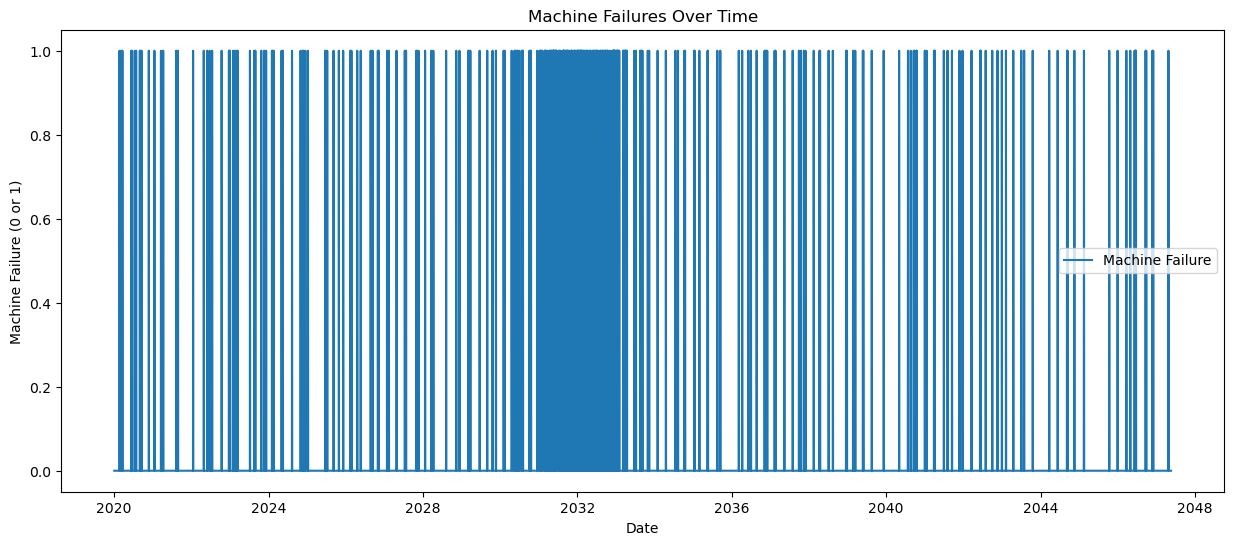

In [16]:
# Exploratory Data Analysis (EDA)

# Visualize the distribution of machine failures according to time series
plt.figure(figsize=(15, 6))
plt.plot(df_encoded['Datetime'], df_encoded['Machine failure'], label='Machine Failure')
plt.xlabel('Date')
plt.ylabel('Machine Failure (0 or 1)')
plt.title('Machine Failures Over Time')
plt.legend()
plt.show()

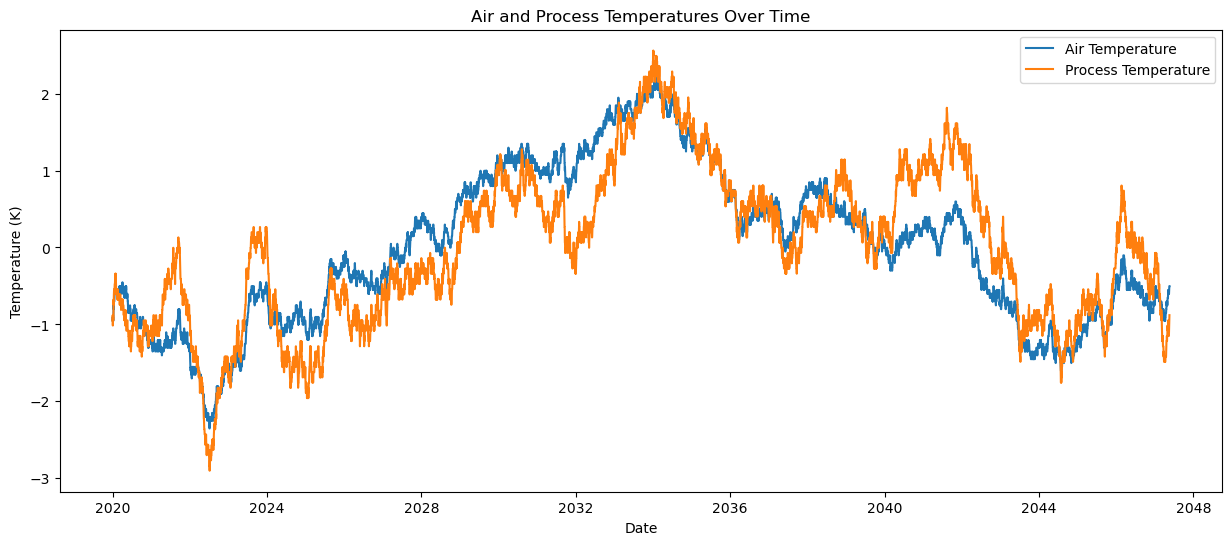

In [17]:
# Visualizing the distribution of air and process temperatures according to time series
plt.figure(figsize=(15, 6))
plt.plot(df_encoded['Datetime'], df_encoded['Air temperature [K]'], label='Air Temperature')
plt.plot(df_encoded['Datetime'], df_encoded['Process temperature [K]'], label='Process Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature (K)')
plt.title('Air and Process Temperatures Over Time')
plt.legend()
plt.show()

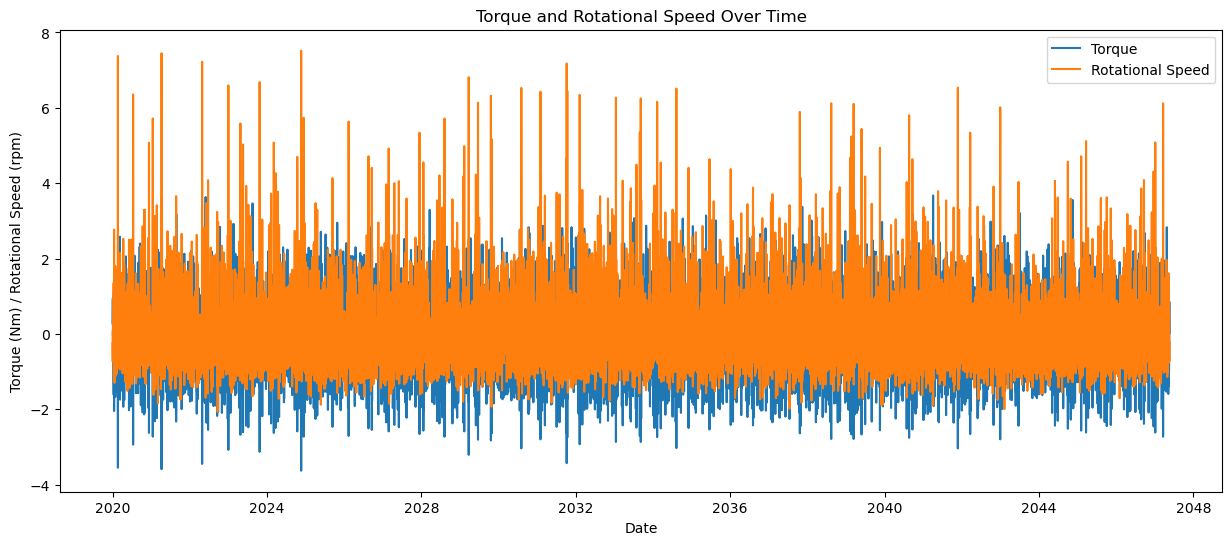

In [18]:
# Time Series Visualization of Torque and Rotary Speed
plt.figure(figsize=(15, 6))
plt.plot(df_encoded['Datetime'], df_encoded['Torque [Nm]'], label='Torque')
plt.plot(df_encoded['Datetime'], df_encoded['Rotational speed [rpm]'], label='Rotational Speed')
plt.xlabel('Date')
plt.ylabel('Torque (Nm) / Rotational Speed (rpm)')
plt.title('Torque and Rotational Speed Over Time')
plt.legend()
plt.show()

In [19]:
# Distribution of Machine Failures by Type
failure_types = ['TWF', 'HDF', 'PWF', 'OSF', 'RNF']
failure_counts = df_encoded[failure_types].sum()

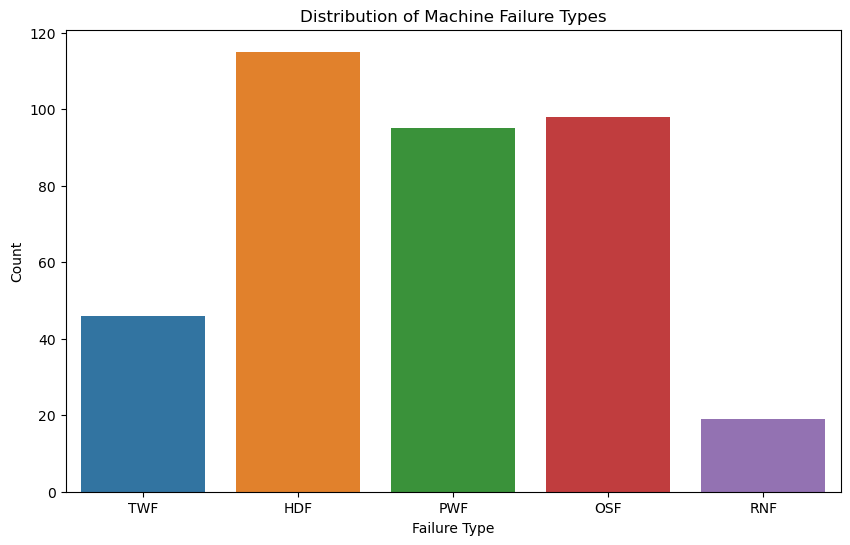

In [20]:
plt.figure(figsize=(10, 6))
sns.barplot(x=failure_types, y=failure_counts)
plt.xlabel('Failure Type')
plt.ylabel('Count')
plt.title('Distribution of Machine Failure Types')
plt.show()

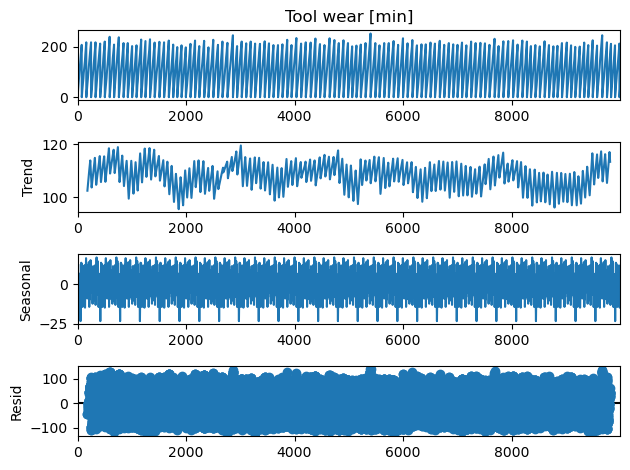

In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Load the dataset
df_original = pd.read_csv('ai4i2020.csv')

# Perform time series decomposition on the "Tool wear [min]" column
tool_wear = df_original['Tool wear [min]']

# Perform time series decomposition
result_tool_wear = seasonal_decompose(tool_wear, model='additive', period=365)

# Visualize the decompose results
result_tool_wear.plot()
plt.show()

In [24]:
# Feature Engineering

# Let's create new properties using the "Machine failure", "Air temperature [K]", and "Tool wear [min]" columns

# Let's calculate the moving averages and standard deviations of air temperature and tool wear
df_original['Air Temp Moving Avg'] = df_original['Air temperature [K]'].rolling(window=30).mean()
df_original['Air Temp Moving Std'] = df_original['Air temperature [K]'].rolling(window=30).std()
df_original['Tool Wear Moving Avg'] = df_original['Tool wear [min]'].rolling(window=30).mean()
df_original['Tool Wear Moving Std'] = df_original['Tool wear [min]'].rolling(window=30).std()

# Show the first few lines of newly created properties
df_original[['Air Temp Moving Avg', 'Air Temp Moving Std', 'Tool Wear Moving Avg', 'Tool Wear Moving Std']].head()

,Air Temp Moving Avg,Air Temp Moving Std,Tool Wear Moving Avg,Tool Wear Moving Std
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN


In [25]:
from sklearn.model_selection import train_test_split

# Create a model to predict tool wear by regression

# First, let's clear the NaN values
df_cleaned = df_original.dropna()

# Distinguish between independent variables and dependent variable (tool wear)
X = df_cleaned[['Air Temp Moving Avg', 'Air Temp Moving Std', 'Tool Wear Moving Avg', 'Tool Wear Moving Std']]
y = df_cleaned['Tool wear [min]']

# Let's separate the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions based on test data
y_pred = model.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2

(1337.0692672875805, 0.6723769441110977)

In [28]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Predicting tool wear using the Decision Tree Regressor model

# Create the Decision Tree Regressor model
dt_model = DecisionTreeRegressor(random_state=42)

# Train the model on the training data set
dt_model.fit(X_train, y_train)

# Make a prediction on the test data set
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model performance
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("MSE:", mse_dt)
print("R^2:", r2_dt)

MSE: 13.246115288220551
R^2: 0.9967542947283597


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Feature Engineering
# For simplicity, let's consider 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 
# and 'Torque [Nm]' as features and 'Tool wear [min]' as the target variable
features = df[['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]']]
target = df['Tool wear [min]']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Creating and fitting the Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(X_train, y_train)

# Predicting on the test set
y_pred = dt_regressor.predict(X_test)

# Calculating the performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2


(7062.555, -0.654258129154381)

In [34]:
# Load the dataset
df = pd.read_csv('ai4i2020.csv')

#Selecting the 'Tool wear [min]' column
ts_data = df['Tool wear [min]']

from statsmodels.tsa.stattools import adfuller

# Run the Augmented Dickey-Fuller test
adf_test = adfuller(ts_data)

# Subtracting the p-value
p_value = adf_test[1]

In [35]:
# Printing test results and p-value to the screen
print("ADF Test Statistic:", adf_test[0])
print("p-value:", adf_test[1])
print("Critical Values:", adf_test[4])

ADF Test Statistic: -25.0803255076067
p-value: 0.0
Critical Values: {'1%': -3.4310066595695945, '5%': -2.861830204343065, '10%': -2.5669244706354584}


In [45]:
print(df.columns)

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF',
       'Type_encoded'],
      dtype='object')


In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [47]:
# Removing unnecessary columns from DataFrame
X = df.drop(['UDI', 'Product ID', 'Machine failure', 'Type'], axis=1)  # 'Datetime' column already extracted
y = df['Machine failure']

# Separating data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the model with RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluating the model's performance
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2907
           1       1.00      0.97      0.98        93

    accuracy                           1.00      3000
   macro avg       1.00      0.98      0.99      3000
weighted avg       1.00      1.00      1.00      3000

[[2907    0]
 [   3   90]]
